In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score,recall_score, accuracy_score, f1_score, precision_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import RobustScaler,LabelEncoder,OneHotEncoder,StandardScaler
from scipy.stats import pearsonr
%matplotlib inline
sns.set_style('white')
pd.set_option('display.float_format', lambda x: '%.6f' % x)
#from xgboost import XGBRegressor
#from xgboost import plot_importance
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,KFold,GridSearchCV,ShuffleSplit
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, classification_report
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                     'Server=DCABOSERVER;'
                     'Database=ToniTest;'
                     'Trusted_Connection=yes;')
cursor=conn.cursor()

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
#Read from SQL Server
data = pd.read_sql_query("""SELECT * FROM DTV300_75To180""",conn)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53562 entries, 0 to 53561
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FileNumber                 53562 non-null  int64  
 1   Zipcode                    53562 non-null  object 
 2   ZipScore                   53562 non-null  int64  
 3   DateLastPaidToClientDays   43500 non-null  float64
 4   DateLastPaid               53562 non-null  object 
 5   DateLastPaidScore          53562 non-null  int64  
 6   TenureDays                 53562 non-null  int64  
 7   Tenure                     53562 non-null  object 
 8   TenureScore                53562 non-null  int64  
 9   Balance                    53562 non-null  float64
 10  BalanceRange               53562 non-null  object 
 11  BalanceScore               53562 non-null  int64  
 12  DelinquencyDays            53562 non-null  int64  
 13  Delinquency                53562 non-null  obj

In [3]:
print('Check for missing values')
print(data.isnull().sum())

Check for missing values
FileNumber                       0
Zipcode                          0
ZipScore                         0
DateLastPaidToClientDays     10062
DateLastPaid                     0
DateLastPaidScore                0
TenureDays                       0
Tenure                           0
TenureScore                      0
Balance                          0
BalanceRange                     0
BalanceScore                     0
DelinquencyDays                  0
Delinquency                      0
DelinquencyScore                 0
DisconnectType                   0
DisconnectTypeScore              0
IRCScore                         0
IRCScoreAZ                       0
CancelCode                       0
CancelCodeScore                  0
CVSScore                         0
CVSScoreAZ                       0
Disconnect2ChargeoffDays         0
Disconnect2Chargeoff             0
Disconnect2ChargeoffScore        0
InvolRiskScore                   0
InvolRiskScoreAZ              

In [4]:
data.shape #53562 rows 29 columns

(53562, 29)

In [5]:
data.head()

FileNumber Zipcode  ZipScore  DateLastPaidToClientDays  \
0    35996883   44119       -20                       nan   
1    35998071   93702       -11                377.000000   
2    35995606   77060       -20                349.000000   
3    36965013   40218        -7                261.000000   
4    35999230   20018        19                277.000000   

                       DateLastPaid  DateLastPaidScore  TenureDays  \
0                    0 - Never Paid                 -6         278   
1  3 - Between a year and 1.5 years                 -5         288   
2     2 - Between half and one year                  1         212   
3     2 - Between half and one year                  1        6091   
4     2 - Between half and one year                  1        3048   

                        Tenure  TenureScore     Balance  ... CancelCode  \
0  4-Between half and one year          -10  539.520000  ...       8102   
1  4-Between half and one year          -10  630.080000  ...       9102   
2  4-Between half and one year          -10  531.810000  ...       1031   
3             10-over 10 years           13  172.430000  ...       1003   
4     9-Between 7 and 10 years           13 1107.310000  ...       9102   

   CancelCodeScore  CVSScore CVSScoreAZ  Disconnect2ChargeoffDays  \
0              -13         0        -14                        60   
1               -9         0        -14                         6   
2               14         0        -14                        60   
3               -2        M5        -20                      2798   
4               -9        P1        -20                      2867   

                    Disconnect2Chargeoff  Disconnect2ChargeoffScore  \
0  002 / More than 30 days Up to 60 days                          7   
1                     000 / Up to 7 days                         -9   
2  002 / More than 30 days Up to 60 days                          7   
3              005 / More than 180 days                          -4   
4              005 / More than 180 days                          -4   

  InvolRiskScore  InvolRiskScoreAZ IsPTP  
0              M               -10     0  
1              L                 7     0  
2              L                 7     0  
3              L                 7     0  
4              M               -10     0  

[5 rows x 29 columns]

In [6]:
data[["CancelCode","IsPTP"]].groupby(["CancelCode"],as_index=False).agg({'CancelCode':'count','IsPTP':'mean'})

CancelCode    IsPTP
0         4047 0.011119
1            6 0.000000
2           18 0.000000
3           10 0.000000
4           22 0.000000
5         2073 0.014954
6           27 0.000000
7          119 0.025210
8           13 0.000000
9         5189 0.016574
10       11211 0.017840
11         198 0.025253
12         504 0.007937
13         625 0.014400
14           1 0.000000
15           1 0.000000
16         117 0.025641
17           3 0.000000
18         188 0.031915
19         770 0.014286
20          65 0.015385
21          28 0.000000
22        7225 0.011211
23          15 0.066667
24         364 0.008242
25         163 0.012270
26           2 0.000000
27          11 0.000000
28          22 0.000000
29          17 0.000000
30       20508 0.009021

In [7]:
data[["CVSScore","IsPTP","CVSScoreAZ"]].groupby(["CVSScore"],as_index=False).agg({'IsPTP': 'mean', 
                                     'CVSScore': 'count','CVSScoreAZ':'mean'})

IsPTP  CVSScore  CVSScoreAZ
0  0.000000        38          -8
1  0.009918      3428         -14
2  0.011293      3542          -1
3  0.000000         8         -12
4  0.000000        17           7
5  0.000000         1          22
6  0.043478        23           3
7  0.000000         2         -20
8  0.000000         2         -20
9  0.011131     15362          -3
10 0.000000         2         -20
11 0.000000         8          -4
12 0.000000         2         -20
13 0.000000         4          -8
14 0.012047     10376           0
15 0.000000         1         -20
16 0.000000         1         -20
17 0.000000         1         -20
18 0.012844     10277           4
19 0.000000         2         -20
20 0.000000         7         -20
21 0.000000         5         -20
22 0.000000         2          21
23 0.000000         7         -20
24 0.000000         1         -20
25 0.000000         2         -20
26 0.000000         1         -20
27 0.333333         3           3
28 0.000000         3         -20
29 0.000000         7          -1
30 0.000000         3         -20
31 0.000000         2         -10
32 0.017645      5214           8
33 0.000000         4          24
34 0.000000         1         -20
35 0.000000         2           3
36 0.015489      5165          15
37 0.000000         1           8
38 0.000000         1         -20
39 0.000000         1         -20
40 0.000000         2         -20
41 0.000000         2          14
42 0.000000         1         -20
43 0.000000         2         -20
44 0.000000         1         -20
45 0.000000         5         -13
46 0.000000         2         -20
47 0.000000        15         -18
48 0.000000         1         -20
49 0.000000         1          72
50 0.000000         1         -20

In [8]:
x=data.drop(["IsPTP","FileNumber","Zipcode","DateLastPaid","DateLastPaidScore","Tenure","TenureScore","BalanceRange","BalanceScore",'Delinquency',"DelinquencyScore","DisconnectTypeScore","IRCScoreAZ","CancelCodeScore","CVSScoreAZ","Disconnect2Chargeoff","Disconnect2ChargeoffScore","InvolRiskScoreAZ"],axis=1)

In [9]:
y=data["IsPTP"]

In [10]:
df=pd.concat([x,y],axis=1)
df.describe()

ZipScore  DateLastPaidToClientDays   TenureDays      Balance  \
count 53562.000000              43500.000000 53562.000000 53562.000000   
mean      6.408106                430.655425  1454.850454   341.421929   
std      50.147504                300.639473  1600.517724   218.868242   
min     -20.000000                204.000000 -1668.000000    25.000000   
25%     -12.000000                323.000000   426.000000   194.147500   
50%      -4.000000                342.000000   807.500000   305.875000   
75%       8.000000                371.000000  1752.000000   463.590000   
max     540.000000               4983.000000  9226.000000 11781.460000   

       DelinquencyDays  Disconnect2ChargeoffDays        IsPTP  
count     53562.000000              53562.000000 53562.000000  
mean        289.330701                 49.259027     0.012621  
std          20.047409                134.797951     0.111633  
min         270.000000              -2446.000000     0.000000  
25%         272.000000                  6.000000     0.000000  
50%         284.000000                 60.000000     0.000000  
75%         304.000000                 60.000000     0.000000  
max        2781.000000               3526.000000     1.000000

In [11]:
df.describe(include=['O'])

DisconnectType IRCScore CancelCode CVSScore InvolRiskScore
count                     53562    53562      53562    53562          53562
unique                        2       21         31       51              5
top     Involuntary Non-payment       95       9102       1L              L
freq                      28157    15011      20508    15362          29882

<Figure size 1440x720 with 0 Axes>

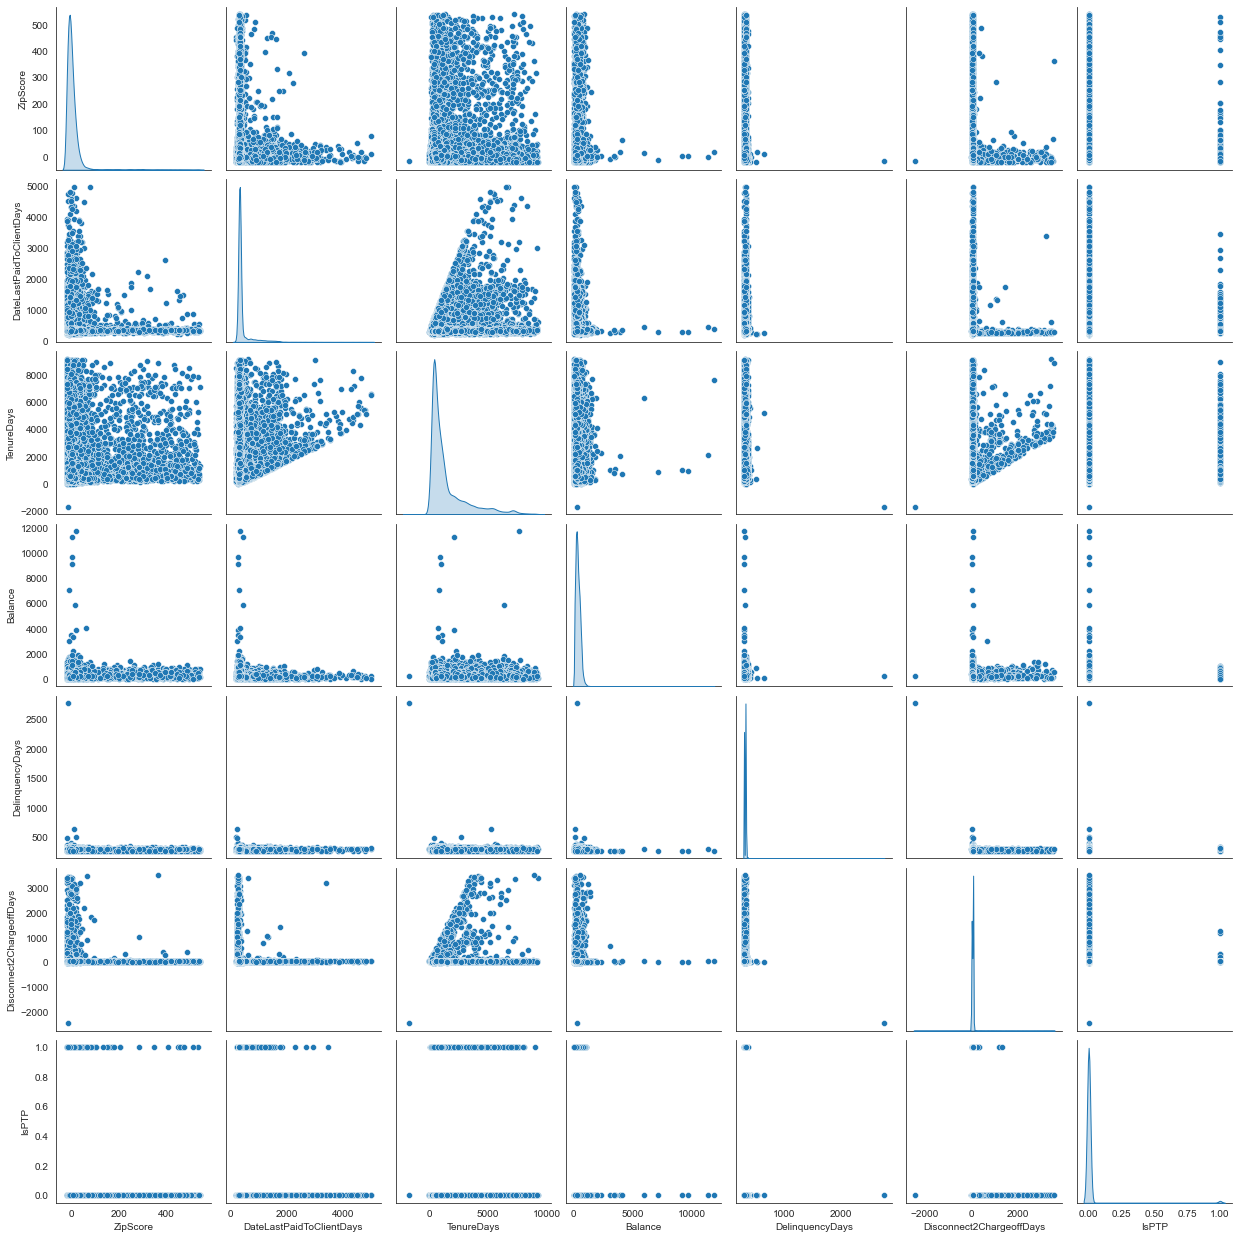

In [12]:
#Find and Drop the outliers
plt.figure(figsize=(20,10))
sns.pairplot(df,diag_kind="kde")
#Remove records with negative tenure days; deliquency days>2500, negative disconnect to chargeoff days

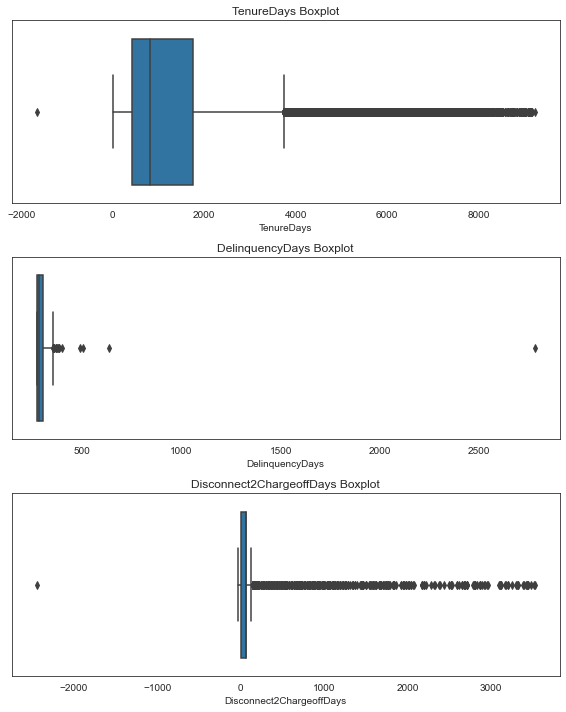

In [13]:
#Boxplot detect outliers
fig,ax=plt.subplots(3,1,figsize=(8,10))
#TenureDays:drop negative and >8000 days
ax1=sns.boxplot(x=df['TenureDays'],ax=ax[0])
ax1.set_title('TenureDays Boxplot')
#DelinquencyDays:drop >2500 days
ax2=sns.boxplot(x=df['DelinquencyDays'],ax=ax[1])
ax2.set_title('DelinquencyDays Boxplot')
#Disconnect2ChargeoffDays:drop negative and >3000
ax3=sns.boxplot(x=df['Disconnect2ChargeoffDays'],ax=ax[2])
ax3.set_title('Disconnect2ChargeoffDays Boxplot')
plt.tight_layout()

In [14]:

# def plot_dist(col,ax):
#     train_df[col][train_df[col].notnull()].value_counts().plot(kind='bar',facecolor='y',ax=ax)
#     ax.set_xlabel('{}'.format(col),fontsize=30)
#     ax.set_title('{} on RPC'.format(col),fontsize=18)
#     return ax
# num_column=x_train.select_dtypes(include=['float64','int64']).columns.values
# f,ax=plt.subplots(3,2,figsize=(22,15))
# f.tight_layout(h_pad=9,w_pad=2,rect=[0,0.03,1,0.93])
# num_column=x_train.select_dtypes(include=['float64','int64']).columns.values
# print(num_column)
# print(len(num_column))
# k=0
# for i in range(3):
#     for j in range(2):
#         plot_dist(num_column[k],ax[i][j])
#         k+=1
# __=plt.suptitle("Initial Distributions of features",fontsize=25)


In [15]:
#For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
num_column=x[['TenureDays','DelinquencyDays','Disconnect2ChargeoffDays']]
z = np.abs(stats.zscore(num_column))
print(z)
df_filtered=df[(np.abs(stats.zscore(num_column)) < 3).all(axis=1)]
#51804 rows after remove the outliers with z-scores

[[0.73530047 0.16614277 0.07968276]
 [0.72905244 0.31578944 0.32092054]
 [0.77653751 0.98114837 0.07968276]
 ...
 [0.4335203  0.68185503 0.07968276]
 [0.53348889 0.91437612 0.07968276]
 [0.27044655 0.91437612 0.07968276]]


In [16]:
# print(f'The original training data contains {x.shape[0]} rows')
# df_filtered= df[(x["TenureDays"] < 9000) & (x["TenureDays"] >0) &
#                                                                     (x['DelinquencyDays'] < 500) &
#                                                                             (x['Disconnect2ChargeoffDays'] < 3500)]

# print(f'The filtered training data contains {df_filtered.shape[0]} rows')

In [17]:
#Encode the Categorical data
cat_column = df.select_dtypes('object').columns.values
print(cat_column)

['DisconnectType' 'IRCScore' 'CancelCode' 'CVSScore' 'InvolRiskScore']


In [18]:
for i in range(len(cat_column)):
    print(pd.crosstab(df[cat_column[i]],df['IsPTP']))
    print('\n')


IsPTP                        0    1
DisconnectType                     
Involuntary Non-payment  27887  270
Voluntary                24999  406


IsPTP         0    1
IRCScore            
1          2833   26
15         8517   94
17         1223   11
3          1122   13
35         3698   41
36            1    0
37          552    6
5          1285   15
55         4122   61
56            1    0
57          624    6
9          4264   55
95        14786  225
96            6    0
97         2024   33
A           218    2
D           130    0
DEF         572   10
IL          428    6
U            21    0
UNK        6459   72


IsPTP           0    1
CancelCode            
1001         4002   45
1002            6    0
1003           18    0
1004           10    0
1005           22    0
1006         2042   31
1008           27    0
1021          116    3
1022           13    0
1030         5103   86
1031        11011  200
1032          193    5
1033          500    4
1034          616    9
1

In [19]:
#IRCScore:replace many IRCScores with a more common name or classify them as Rare
df['IRCScore']=df['IRCScore'].replace(['36','56','96','U','D'],'Rare')
df.groupby(['IRCScore']).agg({'IRCScore':'count','IsPTP':'mean'})

IRCScore    IsPTP
IRCScore                   
1             2859 0.009094
15            8611 0.010916
17            1234 0.008914
3             1135 0.011454
35            3739 0.010965
37             558 0.010753
5             1300 0.011538
55            4183 0.014583
57             630 0.009524
9             4319 0.012734
95           15011 0.014989
97            2057 0.016043
A              220 0.009091
DEF            582 0.017182
IL             434 0.013825
Rare           159 0.000000
UNK           6531 0.011024

In [20]:
df['CancelCode']=df['CancelCode'].replace(['1002','1003','1004','1005','1008','1022','1950','1960','4700','7700','8000','8170','8600','8701','8900','9101'],'Rare')
df.groupby(['CancelCode']).agg({'CancelCode':'count','IsPTP':'mean'})

CancelCode    IsPTP
CancelCode                     
1001              4047 0.011119
1006              2073 0.014954
1021               119 0.025210
1030              5189 0.016574
1031             11211 0.017840
1032               198 0.025253
1033               504 0.007937
1034               625 0.014400
4002               117 0.025641
5200               188 0.031915
7600               770 0.014286
8102              7225 0.011211
8400               364 0.008242
8401               163 0.012270
9102             20508 0.009021
Rare               261 0.007663

In [21]:
CVSScore_count=df['CVSScore'].value_counts().to_frame()
CVS_list=CVSScore_count[CVSScore_count['CVSScore']<50].index.to_list()
df['CVSScore']=df['CVSScore'].replace(CVS_list,'Rare')
df['CVSScore'].value_counts()

1L      15362
2       10376
3       10277
4        5214
5        5165
00       3542
0        3428
Rare      198
Name: CVSScore, dtype: int64

In [22]:
df['InvolRiskScore']=df['InvolRiskScore'].map({'?':0,'H':1,'N':2,'M':3,'L':4})

In [23]:
df['DateLastPaid_Band']=pd.qcut(df['DateLastPaidToClientDays'],q=6,labels=False).astype('object')

In [24]:
pd.crosstab(df['DateLastPaid_Band'],df['IsPTP'])

IsPTP                 0    1
DateLastPaid_Band           
0.000000           7284  111
1.000000           7192   92
2.000000           7340   94
3.000000           6929   78
4.000000           7049   85
5.000000           7147   99

In [25]:
df['DateLastPaid_Band'].fillna('6',inplace=True)
df.drop(["DateLastPaidToClientDays"],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53562 entries, 0 to 53561
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ZipScore                  53562 non-null  int64  
 1   TenureDays                53562 non-null  int64  
 2   Balance                   53562 non-null  float64
 3   DelinquencyDays           53562 non-null  int64  
 4   DisconnectType            53562 non-null  object 
 5   IRCScore                  53562 non-null  object 
 6   CancelCode                53562 non-null  object 
 7   CVSScore                  53562 non-null  object 
 8   Disconnect2ChargeoffDays  53562 non-null  int64  
 9   InvolRiskScore            53562 non-null  int64  
 10  IsPTP                     53562 non-null  int64  
 11  DateLastPaid_Band         53562 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 4.9+ MB


In [27]:
#Label Encoding:
#creating instance of labelencoder
#Assigning numerical values and storing in another column
objList=df.select_dtypes(include='object').columns
print(objList)
le=LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

Index(['DisconnectType', 'IRCScore', 'CancelCode', 'CVSScore',
       'DateLastPaid_Band'],
      dtype='object')


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53562 entries, 0 to 53561
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ZipScore                  53562 non-null  int64  
 1   TenureDays                53562 non-null  int64  
 2   Balance                   53562 non-null  float64
 3   DelinquencyDays           53562 non-null  int64  
 4   DisconnectType            53562 non-null  int32  
 5   IRCScore                  53562 non-null  int32  
 6   CancelCode                53562 non-null  int32  
 7   CVSScore                  53562 non-null  int32  
 8   Disconnect2ChargeoffDays  53562 non-null  int64  
 9   InvolRiskScore            53562 non-null  int64  
 10  IsPTP                     53562 non-null  int64  
 11  DateLastPaid_Band         53562 non-null  int32  
dtypes: float64(1), int32(5), int64(6)
memory usage: 3.9 MB
None


Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients.
Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved.
Standardize variables before running Cluster Analysis(distance), standardizing raw values makes equal variance, make all variables to conribute equally


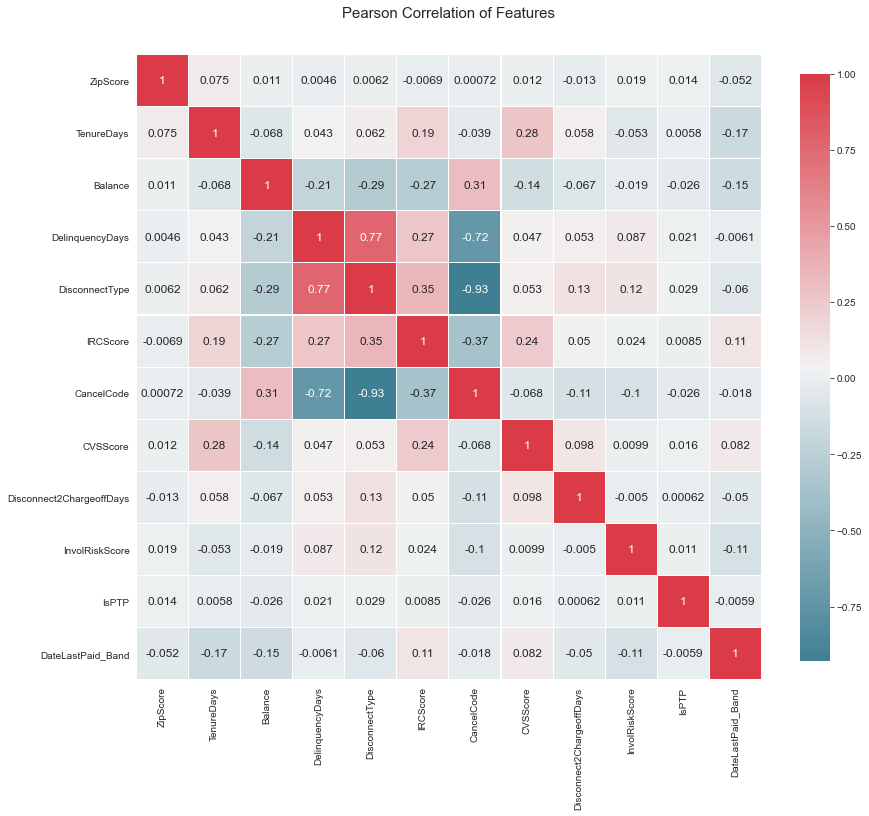

In [29]:
#correlation heatmap of original dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [30]:
#Splitting the dataset
x=df.drop(['IsPTP'],axis=1)
y=df['IsPTP']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,stratify=data["IsPTP"])
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset

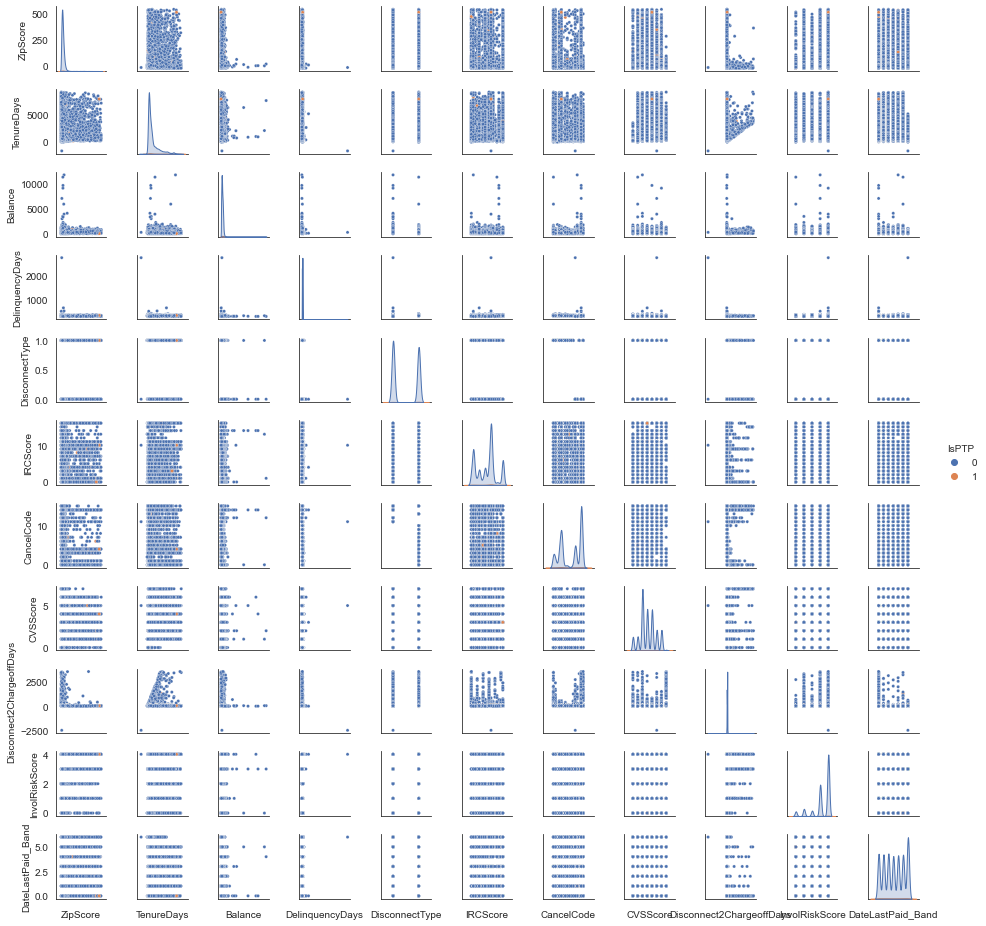

In [31]:
#pair plots of entire dataset
pp = sns.pairplot(df, hue = 'IsPTP', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

### Model Data

In [32]:
# Spot-Check Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [33]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10

    recall = []
    roc_auc=[]
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
        recall.append(cv_recall)
        cv_roc_auc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
        roc_auc.append(cv_roc_auc)
        names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)
        print(f'{name}: recall score: {cv_recall.mean()}, roc_auc score: {cv_roc_auc.mean()}')
        
    return names, recall, roc_auc

In [34]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [35]:
models = GetBasedModel()
names,recall,roc_auc = BasedLine2(x_train, y_train,models)
PlotBoxR().PlotResult(names,roc_auc)

LR: recall score: 0.0, roc_auc score: 0.5965093925252151
LDA: recall score: 0.0, roc_auc score: 0.6113995913419684
KNN: recall score: 0.0, roc_auc score: 0.5201963298654577
CART: recall score: 0.01388235294117647, roc_auc score: 0.5018691291194837
NB: recall score: 0.01576470588235294, roc_auc score: 0.6001517245504576
SVM: recall score: 0.0, roc_auc score: 0.5059398334739844
AB: recall score: 0.0, roc_auc score: 0.6005252857895441
GBM: recall score: 0.00196078431372549, roc_auc score: 0.6063029115463368
RF: recall score: 0.0, roc_auc score: 0.560220762556554
ET: recall score: 0.0, roc_auc score: 0.5458397210175887


In [36]:
def ScoreDataFrame(names,recall,roc_auc):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    recalls = []
    roc_aucs = []
    for r in recall:
        recalls.append(floatingDecimals(r.mean(),4))
    for r in roc_auc:
        roc_aucs.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Recall Score': recalls, 'Roc_Auc Score':roc_aucs})
    return scoreDataFrame

In [37]:
basedLineScore = ScoreDataFrame(names,recall, roc_auc)
basedLineScore

Model  Recall Score  Roc_Auc Score
0    LR      0.000000       0.596500
1   LDA      0.000000       0.611400
2   KNN      0.000000       0.520200
3  CART      0.013900       0.501900
4    NB      0.015800       0.600200
5   SVM      0.000000       0.505900
6    AB      0.000000       0.600500
7   GBM      0.002000       0.606300
8    RF      0.000000       0.560200
9    ET      0.000000       0.545800

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

In [39]:
from imblearn.pipeline import make_pipeline
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    smote= SMOTE(random_state=0)

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('SMOTE',smote),('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('SMOTE',smote),('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('SMOTE',smote),('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('SMOTE',smote),('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('SMOTE',smote),('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

In [40]:

models = GetScaledModel('standard')
names,recall, roc_auc = BasedLine2(x_train, y_train,models)


standardLR: recall score: 0.32329411764705884, roc_auc score: 0.543791623317692
standardLDA: recall score: 0.3095686274509804, roc_auc score: 0.5455333785777097
standardKNN: recall score: 0.15396078431372548, roc_auc score: 0.5302662348074263
standardCART: recall score: 0.06313725490196079, roc_auc score: 0.5088108351958895
standardNB: recall score: 0.7632941176470588, roc_auc score: 0.5900352801224441
standardSVM: recall score: 0.25231372549019604, roc_auc score: 0.5743117672485387
standardAB: recall score: 0.2267450980392157, roc_auc score: 0.5757208762981116
standardGBM: recall score: 0.19517647058823528, roc_auc score: 0.5810002611450831
standardRF: recall score: 0.01584313725490196, roc_auc score: 0.5783361595627216
standardET: recall score: 0.01184313725490196, roc_auc score: 0.5601213421383668


In [41]:
PlotBoxR().PlotResult(names,recall)
PlotBoxR().PlotResult(names,roc_auc)
scaledScoreStandard = ScoreDataFrame(names,recall, roc_auc)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

Model  Recall Score  Roc_Auc Score         Model  Recall Score  \
0    LR      0.000000       0.596500    standardLR      0.323300   
1   LDA      0.000000       0.611400   standardLDA      0.309600   
2   KNN      0.000000       0.520200   standardKNN      0.154000   
3  CART      0.013900       0.501900  standardCART      0.063100   
4    NB      0.015800       0.600200    standardNB      0.763300   
5   SVM      0.000000       0.505900   standardSVM      0.252300   
6    AB      0.000000       0.600500    standardAB      0.226700   
7   GBM      0.002000       0.606300   standardGBM      0.195200   
8    RF      0.000000       0.560200    standardRF      0.015800   
9    ET      0.000000       0.545800    standardET      0.011800   

   Roc_Auc Score  
0       0.543800  
1       0.545500  
2       0.530300  
3       0.508800  
4       0.590000  
5       0.574300  
6       0.575700  
7       0.581000  
8       0.578300  
9       0.560100

### Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [42]:
# clf = RandomForestClassifier(n_estimators=250,
#                               random_state=SEED)
# x_train_res_sc = StandardScaler().fit_transform(x_train_res)
# clf.fit(x_train_res_sc, y_train_res)

# # #############################################################################
# # Plot feature importance
# feature_importance = clf.feature_importances_
# # make importances relative to max importance

# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, x_train_res.columns[sorted_idx])#boston.feature_names[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [43]:
#Load data model library
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [44]:
#Feature Scaling
sc = StandardScaler().fit(x_train)
#fit and transform the training set
x_train_sc = pd.DataFrame(sc.transform(x_train),columns=x_train.columns)
x_test_sc = pd.DataFrame(sc.transform(x_test),columns=x_test.columns)
x_train_sc.info()
df_sc=pd.concat([x_train_sc,y_train],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ZipScore                  40171 non-null  float64
 1   TenureDays                40171 non-null  float64
 2   Balance                   40171 non-null  float64
 3   DelinquencyDays           40171 non-null  float64
 4   DisconnectType            40171 non-null  float64
 5   IRCScore                  40171 non-null  float64
 6   CancelCode                40171 non-null  float64
 7   CVSScore                  40171 non-null  float64
 8   Disconnect2ChargeoffDays  40171 non-null  float64
 9   InvolRiskScore            40171 non-null  float64
 10  DateLastPaid_Band         40171 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [45]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train_sc, y_train)
y_pred = logreg.predict(x_test_sc)
acc_log = round(logreg.score(x_train_sc, y_train) * 100, 2)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13222
           1       0.00      0.00      0.00       169

    accuracy                           0.99     13391
   macro avg       0.49      0.50      0.50     13391
weighted avg       0.97      0.99      0.98     13391



In [46]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train_sc, y_train)
y_pred = svc.predict(x_test_sc)
acc_svc = round(svc.score(x_train_sc, y_train) * 100, 2)
acc_svc
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13222     0]
 [  169     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13222
           1       0.00      0.00      0.00       169

    accuracy                           0.99     13391
   macro avg       0.49      0.50      0.50     13391
weighted avg       0.97      0.99      0.98     13391



In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 0) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
#SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.
#Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

Before OverSampling, counts of label '1': 507
Before OverSampling, counts of label '0': 39664 

After OverSampling, the shape of train_X: (79328, 11)
After OverSampling, the shape of train_y: (79328,) 

After OverSampling, counts of label '1': 39664
After OverSampling, counts of label '0': 39664


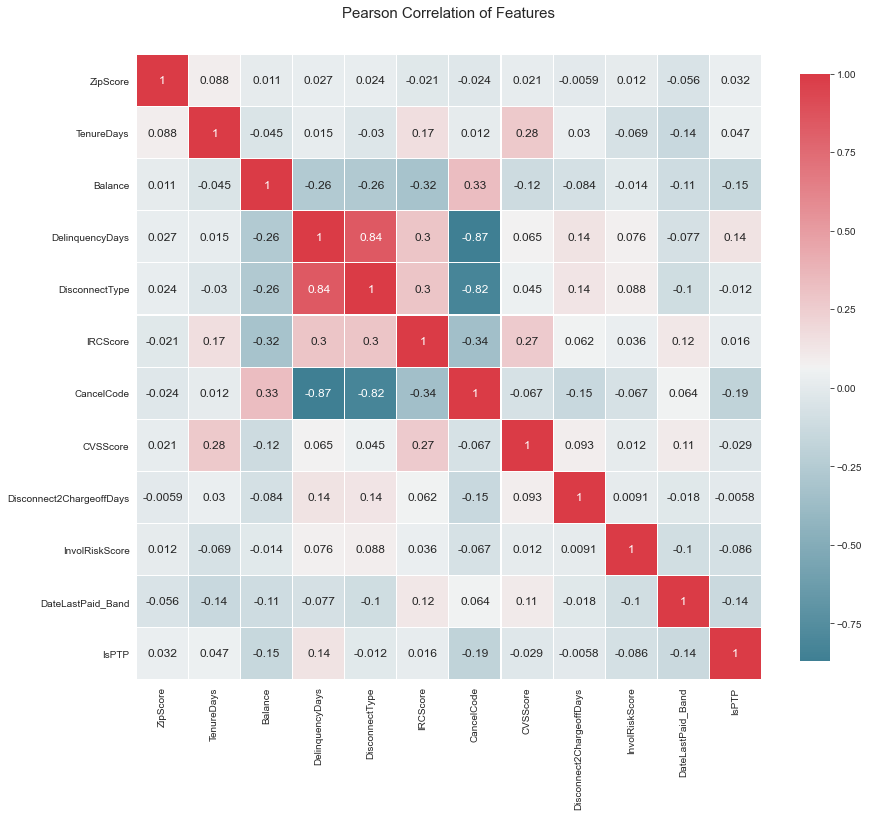

In [48]:
#Correlation Matrix after Oversampling
y_train_res=pd.DataFrame(y_train_res,index=x_train_res.index,columns=['IsPTP'])
df_res= pd.concat([x_train_res,y_train_res],axis=1)
correlation_heatmap(df_res)

In [49]:
#Feature ranking with recursive feature elimination.
from sklearn.feature_selection import RFE
sc = StandardScaler().fit(x_train)
#fit and transform the training set
x_train_res_sc = pd.DataFrame(sc.transform(x_train_res),columns=x_train_res.columns)
x_test__res_sc = pd.DataFrame(sc.transform(x_test),columns=x_test.columns)


model = LogisticRegression(solver='lbfgs',max_iter=250)
rfe = RFE(model, 1)

fit = rfe.fit(x_train_res_sc,y_train_res)
feature_rank=pd.DataFrame(x_train_res_sc.columns,index=fit.ranking_,columns=['Feature'])
feature_rank.sort_index()

# #############################################################################
# # Plot feature importance
# feature_importance = rfe.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

Feature
1                 CancelCode
2             DisconnectType
3            DelinquencyDays
4          DateLastPaid_Band
5                    Balance
6             InvolRiskScore
7   Disconnect2ChargeoffDays
8                   IRCScore
9                   CVSScore
10                  ZipScore
11                TenureDays

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP) 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

In [50]:
lr1 = LogisticRegression() 
lr1.fit(x_train_res_sc, y_train_res) 
predictions = lr1.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
#We have reduced the accuracy to 64% as compared to previous model but the recall value of minority class has also improved to 45 %. This is a good model compared to the previous one. Recall is great.

              precision    recall  f1-score   support

           0       0.99      0.28      0.43     13222
           1       0.01      0.76      0.03       169

    accuracy                           0.28     13391
   macro avg       0.50      0.52      0.23     13391
weighted avg       0.98      0.28      0.43     13391



In [51]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train_res_sc, y_train_res)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train_res, y_train_res) * 100, 2)
acc_svc
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13222     0]
 [  169     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13222
           1       0.00      0.00      0.00       169

    accuracy                           0.99     13391
   macro avg       0.49      0.50      0.50     13391
weighted avg       0.97      0.99      0.98     13391



In [52]:
def score_model(model,cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation(Recall scores)
    """
    global recall,f1,precision,accuracy
    if cv is None:
        cv=KFold(n_split=5,random_state=0)
    smoter = SMOTE(random_state=0)
    accuracy_scores=[]
    recall_scores=[]
    f1_scores=[]
    precision_scores=[]
    roc_auc_scores=[]
    metric_columns = ['roc_auc_scores','accuracy_scores','recall_scores','f1_scores','precision_scores']
    metric_compare = pd.DataFrame(columns = metric_columns)
    for train_fold_index,val_fold_index in cv.split(x_train,y_train):
        #Get the training data
        x_train_fold,y_train_fold = x_train.iloc[train_fold_index],y_train.iloc[train_fold_index]
        #Get the validtion data
        x_val_fold,y_val_fold = x_train.iloc[val_fold_index],y_train.iloc[val_fold_index]
        #Upsample only the data in the training section
        x_train_fold_upsample,y_train_fold_upsample = smoter.fit_resample(x_train_fold,y_train_fold)
        sc=StandardScaler()
        x_train_fold_upsample=sc.fit_transform(x_train_fold_upsample)
        x_val_fold=sc.transform(x_val_fold)
        #Fit the model on the psampled training data
        model_obj = model.fit(x_train_fold_upsample,y_train_fold_upsample)
        #Score the model on the (non-upsampled) validation data
        roc_auc = roc_auc_score(y_val_fold,model_obj.predict(x_val_fold))
        roc_auc_scores.append(roc_auc)
        accuracy = accuracy_score(y_val_fold,model_obj.predict(x_val_fold))
        accuracy_scores.append(accuracy)
        recall = recall_score(y_val_fold,model_obj.predict(x_val_fold))
        recall_scores.append(recall)
        f1=f1_score(y_val_fold,model_obj.predict(x_val_fold))
        f1_scores.append(f1)
        precision=precision_score(y_val_fold,model_obj.predict(x_val_fold))
        precision_scores.append(precision)
    metric_compare['roc_auc_scores']=roc_auc_scores
    metric_compare['accuracy_scores']=accuracy_scores
    metric_compare['recall_scores']=recall_scores
    metric_compare['f1_scores']=f1_scores
    metric_compare['precision_scores']=precision_scores
    return metric_compare
    

        

In [53]:
from sklearn.model_selection import ShuffleSplit
cv_split = ShuffleSplit(n_splits = 5, test_size = .3, train_size = .6, random_state = 0 )

In [54]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = ShuffleSplit(n_splits = 5, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA ROC AUC Score Mean','MLA Accuracy Score Mean','MLA Recall Score Mean', 'MLA F1 Score Mean', 'MLA Precision Score Mean' ,'MLA Accuracy 3*STD']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y




#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = score_model(alg, cv  = cv_split)
    MLA_compare.loc[row_index, 'MLA ROC AUC Score Mean'] = cv_results['roc_auc_scores'].mean()
    MLA_compare.loc[row_index, 'MLA Accuracy Score Mean'] = cv_results['accuracy_scores'].mean()
    MLA_compare.loc[row_index, 'MLA Recall Score Mean'] = cv_results['recall_scores'].mean()
    MLA_compare.loc[row_index, 'MLA F1 Score Mean'] = cv_results['f1_scores'].mean()   
    MLA_compare.loc[row_index, 'MLA Precision Score Mean'] = cv_results['precision_scores'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Accuracy 3*STD'] = cv_results['accuracy_scores'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(x_train,y_train)
    MLA_predict[MLA_name] = alg.predict(x_train)
    
    row_index+=1

    


AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
GradientBoostingClassifier
RandomForestClassifier
LogisticRegressionCV
PassiveAggressiveClassifier
RidgeClassifierCV
SGDClassifier
Perceptron
BernoulliNB
GaussianNB
KNeighborsClassifier
SVC
LinearSVC
DecisionTreeClassifier
ExtraTreeClassifier
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis


In [55]:
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
# MLA_compare['Accuracy+Recall']=MLA_compare['MLA Accuracy Score Mean']+MLA_compare['MLA Recall Score Mean']
# MLA_compare.sort_values(by = ['Accuracy+Recall'], ascending = False, inplace = True)
MLA_compare.sort_values(by=['MLA ROC AUC Score Mean'], ascending = False,inplace=True)
MLA_compare

MLA Name  \
10                    BernoulliNB   
11                     GaussianNB   
18  QuadraticDiscriminantAnalysis   
13                            SVC   
6     PassiveAggressiveClassifier   
8                   SGDClassifier   
5            LogisticRegressionCV   
17     LinearDiscriminantAnalysis   
7               RidgeClassifierCV   
12           KNeighborsClassifier   
14                      LinearSVC   
3      GradientBoostingClassifier   
0              AdaBoostClassifier   
15         DecisionTreeClassifier   
16            ExtraTreeClassifier   
9                      Perceptron   
1               BaggingClassifier   
2            ExtraTreesClassifier   
4          RandomForestClassifier   

                                       MLA Parameters MLA ROC AUC Score Mean  \
10  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...               0.571918   
11           {'priors': None, 'var_smoothing': 1e-09}               0.567453   
18  {'priors': None, 'reg_param': 0.0, 'store_cova...               0.547325   
13  {'C': 1.0, 'break_ties': False, 'cache_size': ...               0.531015   
6   {'C': 1.0, 'average': False, 'class_weight': N...               0.529837   
8   {'alpha': 0.0001, 'average': False, 'class_wei...               0.529832   
5   {'Cs': 10, 'class_weight': None, 'cv': None, '...               0.529426   
17  {'n_components': None, 'priors': None, 'shrink...               0.529420   
7   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...               0.529370   
12  {'algorithm': 'auto', 'leaf_size': 30, 'metric...               0.527875   
14  {'C': 1.0, 'class_weight': None, 'dual': True,...               0.527424   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...               0.523825   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...               0.517823   
15  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...               0.509433   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...               0.508433   
9   {'alpha': 0.0001, 'class_weight': None, 'early...               0.503593   
1   {'base_estimator': None, 'bootstrap': True, 'b...               0.502344   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...               0.499399   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...               0.497022   

   MLA Accuracy Score Mean MLA Recall Score Mean MLA F1 Score Mean  \
10                0.606223              0.536731          0.033238   
11                0.348606              0.791967          0.029773   
18                0.448838              0.648334          0.028794   
13                0.840724              0.213290          0.032732   
6                 0.543180              0.516279          0.028292   
8                 0.748506              0.305475          0.029550   
5                 0.737222              0.316249          0.029357   
17                0.757650              0.295281          0.029651   
7                 0.757551              0.295281          0.029639   
12                0.868653              0.178268          0.032972   
14                0.744773              0.304448          0.029099   
3                 0.866744              0.172015          0.031335   
0                 0.824295              0.203407          0.028288   
15                0.945486              0.062093          0.027858   
16                0.924793              0.081304          0.026489   
9                 0.655659              0.347510          0.024176   
1                 0.969847              0.022737          0.017954   
2                 0.982360              0.003940          0.005618   
4                 0.978974              0.002597          0.003019   

   MLA Precision Score Mean MLA Accuracy 3*STD  
10                 0.017153           0.090503  
11                 0.015173           0.124936  
18                 0.014727           0.102643  
13                 0.017737           0.030870  
6                  0.014632          

Confusion matrix, without normalization
[[8862 4360]
 [  94   75]]
Normalized confusion matrix
[[0.67 0.33]
 [0.56 0.44]]


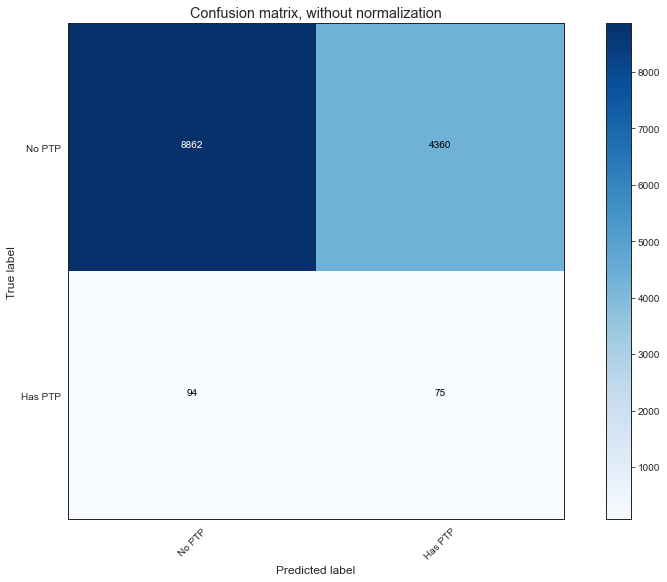

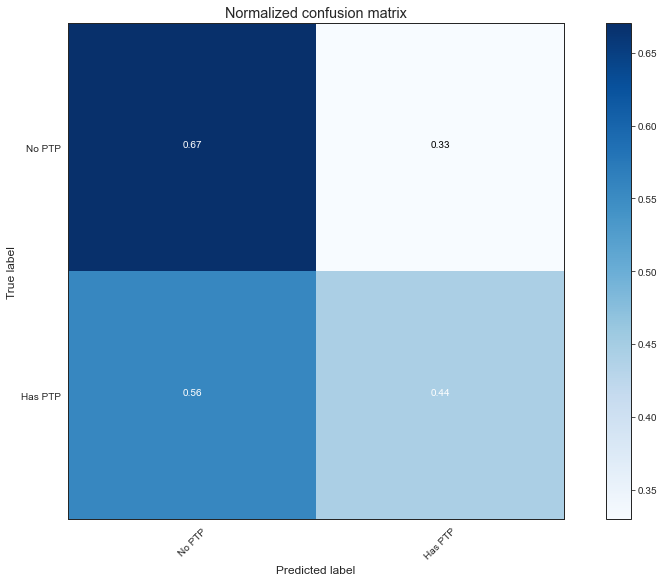

In [56]:
#Plot Accuracy Summary
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
clf=naive_bayes.BernoulliNB().fit(x_train_res,y_train_res)
logreg_pre=clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, logreg_pre)
np.set_printoptions(precision=2)

class_names = ['No PTP','Has PTP']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

### Tune Model with Hyper-Parameters

In [57]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [59]:
pipe = Pipeline([('SMOTE',SMOTE()),('scaling',StandardScaler()),('classifier' , naive_bayes.BernoulliNB())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [linear_model.LogisticRegressionCV()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__solver' : ['liblinear','newton-cg', 'lbfgs']},
    {'classifier' : [naive_bayes.BernoulliNB()],
    'classifier__alpha' : list(np.linspace(0,1,11)),
    'classifier__binarize' : list(np.linspace(0,1,11))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

Fitting 5 folds for each of 127 candidates, totalling 635 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 635 out of 635 | elapsed:   43.7s finished


Best: 0.737547 using {'classifier': LogisticRegressionCV(penalty='l1', solver='liblinear'), 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Accuracy Score : 0.7329549697558061
Precision Score : 0.013146613318090883
Recall Score : 0.27218934911242604
F1 Score : 0.02508178844056707
Confusion matrix, without normalization
[[9769 3453]
 [ 123   46]]


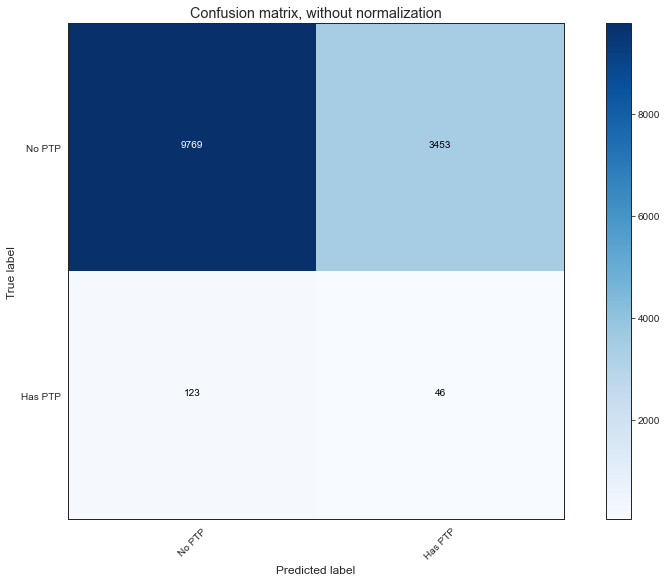

In [60]:
#Predict values based on new parameters
y_pred_acc = best_clf.predict(x_test)
print("Best: %f using %s" % (best_clf.best_score_, best_clf.best_params_))
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
cm=confusion_matrix(y_test,y_pred_acc)
cm
plot_confusion_matrix(cm,classes=class_names,
                      title='Confusion matrix, without normalization')

In [61]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [69]:
import time

#Hyperparameter Tune with GridSearchCV:
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

vote_est = [
#     ('lsv', svm.LinearSVC()),    
#     ('gpc', gaussian_process.GaussianProcessClassifier()),
    ('qd', discriminant_analysis.QuadraticDiscriminantAnalysis()),
    ('lr',  linear_model.LogisticRegressionCV()),
    ('sgd', linear_model.SGDClassifier()),
    #('lrp', linear_model.Perceptron()),     
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    ('knn', neighbors.KNeighborsClassifier()),
    #('mlp', neural_network.MLPClassifier()),
    ('svc', svm.SVC(probability=True)),
    ('ada', AdaBoostClassifier()),
    ('bc',  ensemble.BaggingClassifier()),
    ('etc', ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
 


]

grid_seed = [5362]

grid_param = [   
            # LinearSVC             
#             {'Classifier__C': [1, 2], 
#              'Classifier__loss':{'hinge', 'squared_hinge'},
#              'Classifier__n_random_state': grid_seed}, 
            # GaussianProcessClassifier             
#             {    
#             'Classifier__max_iter_predict': grid_n_estimator,#default: 100
#             'Classifier__random_state': grid_seed
#             },
            # QuadraticDiscriminantAnalysis             
            {},
    
            # LogisticRegressionCV             
            {
            'Classifier__fit_intercept': grid_bool,
            'Classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'Classifier__random_state': grid_seed
            },
    
            # SGDClassifier             
            {
            'Classifier__fit_intercept': grid_bool,
            'Classifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
            'Classifier__random_state': grid_seed
            },
    
            # Perceptron             #[{             #'fit_intercept': [True, False],             #'random_state': grid_seed             #}],             
            # BernoulliNB             
            {
            'Classifier__alpha':  grid_ratio, #default: 1.0
            },
    
            # GaussianNB             
            {'Classifier__var_smoothing': np.logspace(0,-9, num=100)},
    
            # KNeighborsClassifier             
            {
            'Classifier__n_neighbors': [5,6,7],
            'Classifier__weights': ['uniform', 'distance'],
            'Classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'Classifier__metric': ['minkowski'],
            'Classifier__leaf_size': [16, 22]
            },
    
            # MLPClassifier             
#             [{
#             'activation': ['identity', 'logistic', 'tanh', 'relu'],
#             'solver': ['lbfgs', 'sgd', 'adam'],
#             'learning_rate': ['constant', 'invscaling', 'adaptive'],
#             'random_state': grid_seed
#             }],
            
            # SVC             
            {
            'Classifier__C': [3,4,5],
            'Classifier__gamma': [.1, .25, .5],
            'Classifier__decision_function_shape': ['ovo', 'ovr'],
            'Classifier__probability': [True],
            'Classifier__random_state': grid_seed
            },
            # AdaBoostClassifier             
            {
            'Classifier__n_estimators': [50, 100, 200],
            'Classifier__learning_rate': [.05, .1, .2],
            'Classifier__random_state': grid_seed
            },
       
            # BaggingClassifier             
            {
            'Classifier__n_estimators': [200, 300, 400],
            'Classifier__max_samples': [.2, .3, .5],
            'Classifier__random_state': grid_seed
            },
            
            # ExtraTreesClassifier             
            {
            'Classifier__n_estimators': [50, 100, 300],
            'Classifier__criterion': ['gini', 'entropy'],
            'Classifier__max_depth': [6, 8, None],
            'Classifier__random_state': grid_seed
            },

            # GradientBoostingClassifier             
            {
            'Classifier__learning_rate': [.1, .3], 
            'Classifier__n_estimators': [100, 300, 500], 
            'Classifier__max_depth': [2, 4, 6],
            'Classifier__random_state': grid_seed
            },

            # RandomForestClassifier             
            {
            'Classifier__n_estimators': [100, 300, 500],
            'Classifier__criterion': ['gini', 'entropy'],
            'Classifier__max_depth': [6, 8, None],
            'Classifier__oob_score': [True, False],
            'Classifier__random_state': grid_seed
            },
    
    
    

   
        ]
for clf, param in zip (vote_est, grid_param):
    print(f'{clf[1]}:')
    start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter for clf, param in zip (vote_est, grid_param):
    start = time.perf_counter()
    pipe = Pipeline([('SMOTE',SMOTE(random_state=0)),('Scaler',StandardScaler()), ('Classifier',clf[1])])
    best_search = GridSearchCV(pipe, param_grid = param, cv = 5, scoring = "recall",return_train_score=True)
    best_search.fit(x_train, y_train)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print("The best parameter for {} is {} with a runtime of {:.2f} seconds.".format(clf[1].__class__.__name__, best_param, run))
    best_param_copy={}
    if best_param != {}:
        for key,val in best_param.items():
            key=key.replace('Classifier__','')
            best_param_copy[key]=val
    clf[1].set_params(**best_param_copy) 
    run_total = time.perf_counter() - start_total
    score=best_search.best_score_
    print(f'Best Validation score: {score}')
    print("Total optimization time was {:.2f} minutes.".format(run_total/60))

    print("-"*10)

QuadraticDiscriminantAnalysis():
The best parameter for QuadraticDiscriminantAnalysis is {} with a runtime of 0.57 seconds.
Best Validation score: 0.7021743350805669
Total optimization time was 0.01 minutes.
----------
LogisticRegressionCV():


C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearc

The best parameter for LogisticRegressionCV is {'Classifier__fit_intercept': True, 'Classifier__random_state': 5362, 'Classifier__solver': 'newton-cg'} with a runtime of 172.41 seconds.
Best Validation score: 0.3155892059794214
Total optimization time was 2.87 minutes.
----------
SGDClassifier():
The best parameter for SGDClassifier is {'Classifier__fit_intercept': False, 'Classifier__loss': 'modified_huber', 'Classifier__random_state': 5362} with a runtime of 11.27 seconds.
Best Validation score: 0.3412152980003883
Total optimization time was 0.19 minutes.
----------
BernoulliNB():
The best parameter for BernoulliNB is {'Classifier__alpha': 0.1} with a runtime of 2.34 seconds.
Best Validation score: 0.5463211026985052
Total optimization time was 0.04 minutes.
----------
GaussianNB():
The best parameter for GaussianNB is {'Classifier__var_smoothing': 1.0} with a runtime of 41.71 seconds.
Best Validation score: 0.9506891865657154
Total optimization time was 0.70 minutes.
----------
KNei

In [72]:
##### Hard Vote or majority rules w/Tuned Hyperparameters

grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
pipe = Pipeline([('SMOTE',SMOTE(random_state=0)),('Scaler',StandardScaler()), ('Classifier',grid_hard)])
grid_hard_cv = model_selection.cross_validate(pipe, x_train, y_train, cv  = cv_split)
grid_hard.fit(x_test,y_test)

#print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
pipe = Pipeline([('SMOTE',SMOTE(random_state=0)),('Scaler',StandardScaler()), ('Classifier',grid_soft)])
grid_soft_cv = model_selection.cross_validate(pipe, x_train, y_train, cv  = cv_split)
grid_soft.fit(x_test,y_test)

#print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search

Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.96
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 4.54
----------


C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Xiaotong Mu\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search

Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 85.48
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 4.34
----------


##### 